<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_in_the_works/blob/main/IV_sci5_kni5_saving_csv%2Cjson%2Cpkl_Sept24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-09-24 14:54:55--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-09-24 14:54:55 (47.9 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

In [1]:
from icevision.all import *

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [2]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.9.0a1
torch v 1.8.0+cu101
torchvision v 0.9.0+cu101


In [3]:
#option 1: git clone
!git clone https://github.com/yrodriguezmd/scissors5_knife5.git 
# initially run with no File9, later added

#option 2:
#colab upload

Cloning into 'scissors5_knife5'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [4]:
!ls

'=5.1'	 install_colab.sh   sample_data   scissors5_knife5


In [5]:
!ls scissors5_knife5/images

File10.JPG  File2.jpg  File4.jpg  File6.jpg  File8.jpg
File1.jpg   File3.jpg  File5.jpg  File7.jpg  File9.jpg


In [6]:
image_path = Path('scissors5_knife5/images')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[9])
img = img.convert('RGB')

#img.to_thumb(150,150)

In [7]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [8]:
from icevision.models.checkpoint import *

In [9]:
selection = 0

extra_args = {}

if selection == 0:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x

elif selection == 1:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 2:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 3:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

## try resnet 101
## try efficient det, heavier backbone

(<module 'icevision.models.mmdet.models.retinanet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/retinanet/__init__.py'>,
 {})

In [10]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map), **extra_args) 


  0%|          | 0/152149505 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader


In [11]:
backbone.__dict__

# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.10.0/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'model_name': 'retinanet',
 'pretrained': True,
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'}

In [12]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]##

img_size = 384 #460
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)##

In [13]:
len(imgs_array)
## 10 images in Dataset

10

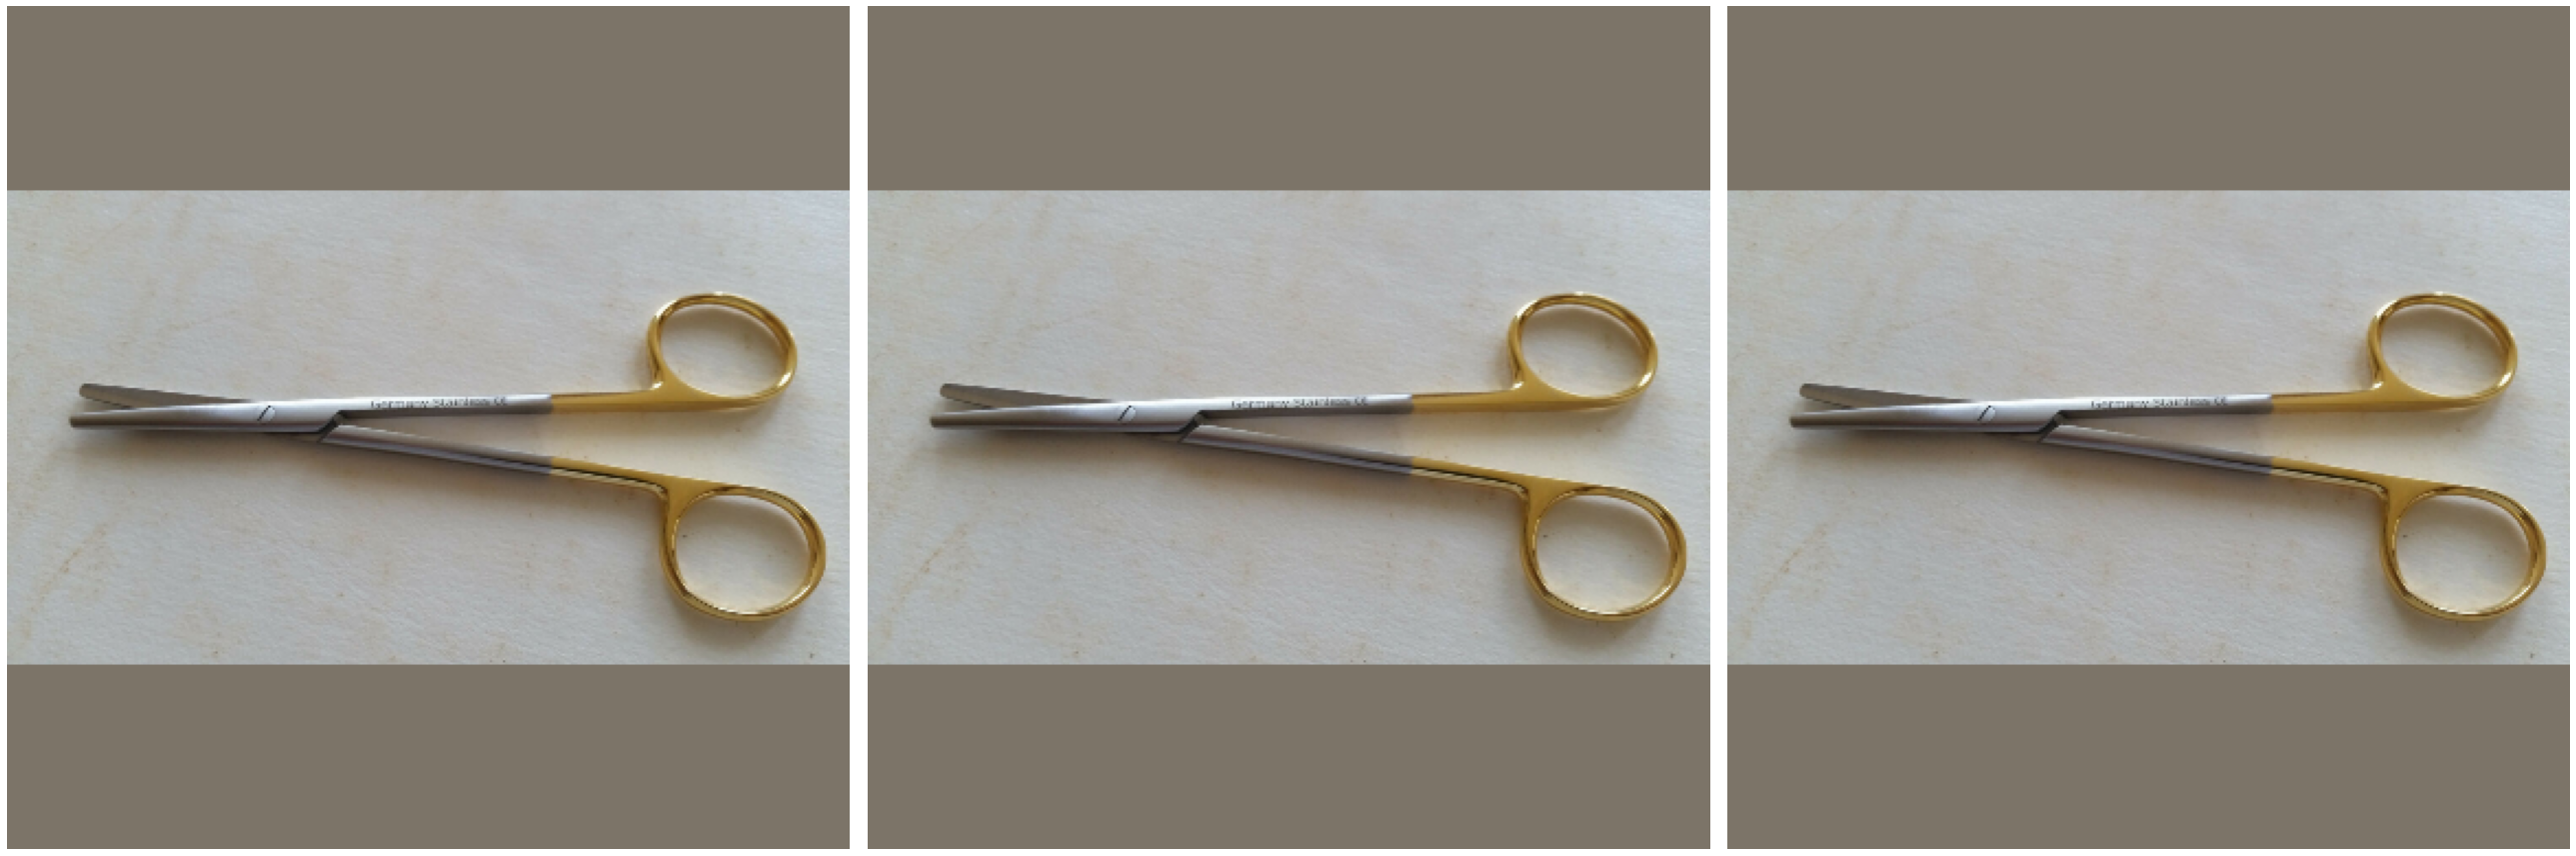

In [14]:
#samples = [infer_ds[8] for _ in range(3)]
#show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [28]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
preds_saved

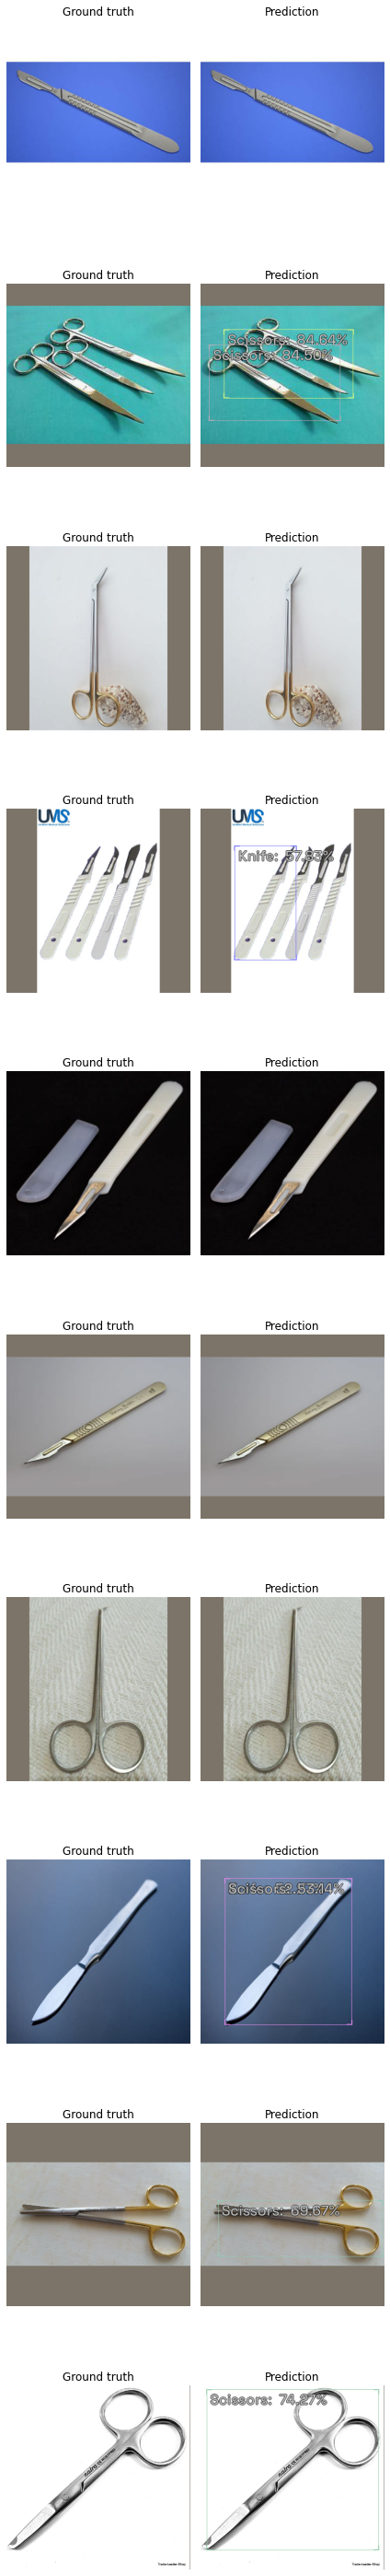

In [16]:
show_preds(preds_saved, font_size=30)

In [29]:
preds_saved[1].pred

BaseRecord

common: 
	- Image size ImgSize(width=384, height=384)
	- Record ID: 1
	- Img: 384x384x3 <np.ndarray> Image
detection: 
	- Scores: [     0.8464       0.845]
	- BBoxes: [<BBox (xmin:49.3341064453125, ymin:97.97958374023438, xmax:318.367431640625, ymax:240.14508056640625)>, <BBox (xmin:18.595291137695312, ymin:129.56948852539062, xmax:291.96270751953125, ymax:287.2333679199219)>]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tenni

In [18]:
preds_saved[1].pred.as_dict
## no filepath, 
## not equal-sized array
# --> not optimal to use for csv formatting

<bound method BaseRecord.as_dict of BaseRecord

common: 
	- Record ID: 1
	- Image size ImgSize(width=384, height=384)
	- Img: 384x384x3 <np.ndarray> Image
detection: 
	- Scores: [     0.8464       0.845]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot

In [30]:
preds_saved[1].__dict__
# 2 similar commons, 2 different detections (2 detections combined in the 2nd)

{'ground_truth': BaseRecord
 
 common: 
 	- Img: 384x384x3 <np.ndarray> Image
 	- Image size ImgSize(width=384, height=384)
 	- Record ID: 1
 detection: 
 	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'donut': 55, '

In [31]:
# adjusting base record to incorporate filepath
#https://github.com/airctic/icevision/blob/e60c2e2117c012ca5c323088f8577935a87c4f4e/icevision/core/record_components.py
for pred in preds_saved:
  pred.add_component(FilepathRecordComponent())

In [20]:
preds_saved

In [21]:
preds_saved[0]

In [22]:
img_files[0]

Path('scissors5_knife5/images/File1.jpg')

In [32]:
# adding the filepath for each file after adjusting baserecord
for _ in range(len(preds_saved)):
  preds_saved[_].set_filepath(img_files[_])
## set the correct image file

In [33]:
conv = convert_preds_to_coco_style(preds_saved)
conv
# same as convert_records_to_coco_style(preds_saved)
# https://github.com/airctic/icevision/blob/master/icevision/data/convert_records_to_coco_style.py#L78
# https://github.com/pytorch/vision/blob/master/references/detection/coco_utils.py

{'annotations': [{'area': 38247.258,
   'bbox': [49.334106, 97.97958, 269.03333, 142.1655],
   'category_id': 77,
   'id': 1,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.8464001},
  {'area': 43100.168,
   'bbox': [18.595291, 129.56949, 273.36743, 157.66388],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.8449992},
  {'area': 30475.344,
   'bbox': [71.59518, 77.5887, 128.17676, 237.7603],
   'category_id': 44,
   'id': 3,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.5782669},
  {'area': 80640.82,
   'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
   'category_id': 44,
   'id': 4,
   'image_id': 7,
   'iscrowd': 0,
   'score': 0.5226521},
  {'area': 80640.82,
   'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
   'category_id': 77,
   'id': 5,
   'image_id': 7,
   'iscrowd': 0,
   'score': 0.5314472},
  {'area': 39972.527,
   'bbox': [37.142227, 163.946, 342.07367, 116.85356],
   'category_id': 77,
   'id': 6,
   'image_id': 8,
   'iscr

In [23]:
conv.items()

dict_items([('images', [{'id': 0, 'file_name': 'File1.jpg', 'width': 384, 'height': 384}, {'id': 1, 'file_name': 'File10.JPG', 'width': 384, 'height': 384}, {'id': 2, 'file_name': 'File2.jpg', 'width': 384, 'height': 384}, {'id': 3, 'file_name': 'File3.jpg', 'width': 384, 'height': 384}, {'id': 4, 'file_name': 'File4.jpg', 'width': 384, 'height': 384}, {'id': 5, 'file_name': 'File5.jpg', 'width': 384, 'height': 384}, {'id': 6, 'file_name': 'File6.jpg', 'width': 384, 'height': 384}, {'id': 7, 'file_name': 'File7.jpg', 'width': 384, 'height': 384}, {'id': 8, 'file_name': 'File8.jpg', 'width': 384, 'height': 384}, {'id': 9, 'file_name': 'File9.jpg', 'width': 384, 'height': 384}]), ('annotations', [{'image_id': 1, 'category_id': 77, 'bbox': [49.334106, 97.97958, 269.03333, 142.1655], 'area': 38247.258, 'iscrowd': 0, 'score': 0.8464001, 'id': 1}, {'image_id': 1, 'category_id': 77, 'bbox': [18.595291, 129.56949, 273.36743, 157.66388], 'area': 43100.168, 'iscrowd': 0, 'score': 0.8449992, 'id'

In [25]:
for key, val in conv.items():
  print(val)

[{'id': 0, 'file_name': 'File1.jpg', 'width': 384, 'height': 384}, {'id': 1, 'file_name': 'File10.JPG', 'width': 384, 'height': 384}, {'id': 2, 'file_name': 'File2.jpg', 'width': 384, 'height': 384}, {'id': 3, 'file_name': 'File3.jpg', 'width': 384, 'height': 384}, {'id': 4, 'file_name': 'File4.jpg', 'width': 384, 'height': 384}, {'id': 5, 'file_name': 'File5.jpg', 'width': 384, 'height': 384}, {'id': 6, 'file_name': 'File6.jpg', 'width': 384, 'height': 384}, {'id': 7, 'file_name': 'File7.jpg', 'width': 384, 'height': 384}, {'id': 8, 'file_name': 'File8.jpg', 'width': 384, 'height': 384}, {'id': 9, 'file_name': 'File9.jpg', 'width': 384, 'height': 384}]
[{'image_id': 1, 'category_id': 77, 'bbox': [49.334106, 97.97958, 269.03333, 142.1655], 'area': 38247.258, 'iscrowd': 0, 'score': 0.8464001, 'id': 1}, {'image_id': 1, 'category_id': 77, 'bbox': [18.595291, 129.56949, 273.36743, 157.66388], 'area': 43100.168, 'iscrowd': 0, 'score': 0.8449992, 'id': 2}, {'image_id': 3, 'category_id': 44, 

In [58]:
len(conv.items())

2

In [62]:
conv['images']
# 'id' for each image

[{'file_name': 'File1.jpg', 'height': 384, 'id': 0, 'width': 384},
 {'file_name': 'File10.JPG', 'height': 384, 'id': 1, 'width': 384},
 {'file_name': 'File2.jpg', 'height': 384, 'id': 2, 'width': 384},
 {'file_name': 'File3.jpg', 'height': 384, 'id': 3, 'width': 384},
 {'file_name': 'File4.jpg', 'height': 384, 'id': 4, 'width': 384},
 {'file_name': 'File5.jpg', 'height': 384, 'id': 5, 'width': 384},
 {'file_name': 'File6.jpg', 'height': 384, 'id': 6, 'width': 384},
 {'file_name': 'File7.jpg', 'height': 384, 'id': 7, 'width': 384},
 {'file_name': 'File8.jpg', 'height': 384, 'id': 8, 'width': 384},
 {'file_name': 'File9.jpg', 'height': 384, 'id': 9, 'width': 384}]

In [63]:
conv['annotations']
# 'id' for each annotation

[{'area': 38247.258,
  'bbox': [49.334106, 97.97958, 269.03333, 142.1655],
  'category_id': 77,
  'id': 1,
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.8464001},
 {'area': 43100.168,
  'bbox': [18.595291, 129.56949, 273.36743, 157.66388],
  'category_id': 77,
  'id': 2,
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.8449992},
 {'area': 30475.344,
  'bbox': [71.59518, 77.5887, 128.17676, 237.7603],
  'category_id': 44,
  'id': 3,
  'image_id': 3,
  'iscrowd': 0,
  'score': 0.5782669},
 {'area': 80640.82,
  'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
  'category_id': 44,
  'id': 4,
  'image_id': 7,
  'iscrowd': 0,
  'score': 0.5226521},
 {'area': 80640.82,
  'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
  'category_id': 77,
  'id': 5,
  'image_id': 7,
  'iscrowd': 0,
  'score': 0.5314472},
 {'area': 39972.527,
  'bbox': [37.142227, 163.946, 342.07367, 116.85356],
  'category_id': 77,
  'id': 6,
  'image_id': 8,
  'iscrowd': 0,
  'score': 0.69666785},
 {'area': 120378.13,
  

In [64]:
len(conv['annotations'])

7

In [65]:
len(conv['images'])

10

In [75]:
for im, an in conv.items():
  for _ in an:
    print(_)

{'id': 0, 'file_name': 'File1.jpg', 'width': 384, 'height': 384}
{'id': 1, 'file_name': 'File10.JPG', 'width': 384, 'height': 384}
{'id': 2, 'file_name': 'File2.jpg', 'width': 384, 'height': 384}
{'id': 3, 'file_name': 'File3.jpg', 'width': 384, 'height': 384}
{'id': 4, 'file_name': 'File4.jpg', 'width': 384, 'height': 384}
{'id': 5, 'file_name': 'File5.jpg', 'width': 384, 'height': 384}
{'id': 6, 'file_name': 'File6.jpg', 'width': 384, 'height': 384}
{'id': 7, 'file_name': 'File7.jpg', 'width': 384, 'height': 384}
{'id': 8, 'file_name': 'File8.jpg', 'width': 384, 'height': 384}
{'id': 9, 'file_name': 'File9.jpg', 'width': 384, 'height': 384}
{'image_id': 1, 'category_id': 77, 'bbox': [49.334106, 97.97958, 269.03333, 142.1655], 'area': 38247.258, 'iscrowd': 0, 'score': 0.8464001, 'id': 1}
{'image_id': 1, 'category_id': 77, 'bbox': [18.595291, 129.56949, 273.36743, 157.66388], 'area': 43100.168, 'iscrowd': 0, 'score': 0.8449992, 'id': 2}
{'image_id': 3, 'category_id': 44, 'bbox': [71.59

In [148]:
import csv

fieldnames = ['id','file_name','width','height',
              'image_id','category_id','bbox','area','iscrowd','score'] #not including id for annots

with open('annot2.csv', 'w') as csvfile:
  writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
  writer.writeheader()
  for key, val in conv.items():
    #for _ in val:
    writer.writerows(val)
    #print(val[1])

In [174]:
import pandas as pd
df=pd.read_csv('annot2.csv')
df

,id,file_name,width,height,image_id,category_id,bbox,area,iscrowd,score
0,0,File1.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,File10.JPG,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,File2.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,File3.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,File4.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,File5.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,File6.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,File7.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,File8.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,File9.jpg,384.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df['image_id'] = df.image_id.astype('Int64')

In [176]:
# df.infer_objects()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17 non-null     int64  
 1   file_name    10 non-null     object 
 2   width        10 non-null     float64
 3   height       10 non-null     float64
 4   image_id     7 non-null      Int64  
 5   category_id  7 non-null      float64
 6   bbox         7 non-null      object 
 7   area         7 non-null      float64
 8   iscrowd      7 non-null      float64
 9   score        7 non-null      float64
dtypes: Int64(1), float64(6), int64(1), object(2)
memory usage: 1.5+ KB


In [177]:
df

,id,file_name,width,height,image_id,category_id,bbox,area,iscrowd,score
0,0,File1.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
1,1,File10.JPG,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
2,2,File2.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
3,3,File3.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
4,4,File4.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
5,5,File5.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
6,6,File6.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
7,7,File7.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
8,8,File8.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN
9,9,File9.jpg,384.0,384.0,<NA>,NaN,NaN,NaN,NaN,NaN


CSV attempts:

- images 'id' and annotations 'image_id' could be merged

- issues with dtypes, initially all strings.  With type conversion, had some issues because of the nans.

- option to create separate dfs for images and annotations, then merge on 'id' and 'image_id'.  However, will be tedious for a bigger dataset.

- using csv writer, creating text files instead of csv.

- not showing in roboflow upload

In [198]:
conv

{'annotations': [{'area': 38247.258,
   'bbox': [49.334106, 97.97958, 269.03333, 142.1655],
   'category_id': 77,
   'id': 1,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.8464001},
  {'area': 43100.168,
   'bbox': [18.595291, 129.56949, 273.36743, 157.66388],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.8449992},
  {'area': 30475.344,
   'bbox': [71.59518, 77.5887, 128.17676, 237.7603],
   'category_id': 44,
   'id': 3,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.5782669},
  {'area': 80640.82,
   'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
   'category_id': 44,
   'id': 4,
   'image_id': 7,
   'iscrowd': 0,
   'score': 0.5226521},
  {'area': 80640.82,
   'bbox': [51.31749, 39.31888, 264.43347, 304.95694],
   'category_id': 77,
   'id': 5,
   'image_id': 7,
   'iscrowd': 0,
   'score': 0.5314472},
  {'area': 39972.527,
   'bbox': [37.142227, 163.946, 342.07367, 116.85356],
   'category_id': 77,
   'id': 6,
   'image_id': 8,
   'iscr

In [200]:
#import json
#with open('conv.json', 'w') as fp:
#  json.dump(conv, fp)
##TypeError: Object of type int32 is not JSON serializable

In [205]:
def convert(o):
  if isinstance(o, numpy.int64): return int(o)
  #raise TypeError

import numpy
json.dumps({'value': numpy.int64(42)}, default= convert)

'{"value": 42}'

In [206]:
import json
with open('conv.json', 'w') as fp:
  json.dump(conv, fp, default = convert)

## downloaded, able to open with jupyter

- JSON attempt

- initial error for dtype

- after def for convert, able to dump file to colab, downloaded

- roboflow: accepted but images not annotated

In [229]:
import pickle

f = open('file.pkl', 'wb')

pickle.dump(conv, f)

f.close()

- Pickle attempt

- with pkl dump in colab

- roboflow not accepting pkl files

- Other codes for creating the CSV using 1 df per column

In [94]:
csv =[]
for _ in range(len(preds_saved)):
  rec = preds_saved[_].pred.common.record_id
  csv.append(rec)
  
df1 = pd.DataFrame(csv, columns = ['record_id'])
df1
## figure out how to place image filename

,record_id
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [90]:
csv_size = []
for _ in range(len(preds_saved)):
  size = preds_saved[_].pred.common.img_size
  csv_size.append(size)
df2 = pd.DataFrame(csv_size)

In [93]:
df1.merge(df2, left_index=True, right_index=True)

,record_id,width,height
0,0,384,384
1,1,384,384
2,2,384,384
3,3,384,384
4,4,384,384
5,5,384,384
6,6,384,384
7,7,384,384
8,8,384,384
9,9,384,384


In [101]:
csv = []
for _ in range(len(preds_saved)):
  lab = preds_saved[_].pred.detection.labels
  csv.append(lab)
df3 = pd.DataFrame(csv)
df3

,0,1
0,None,None
1,scissors,scissors
2,None,None
3,knife,None
4,None,None
5,None,None
6,None,None
7,knife,scissors
8,scissors,None
9,scissors,None


In [126]:
csv = []
for _ in range(len(preds_saved)):
  lab = preds_saved[_].pred.detection.labels
  if len(lab)==0:
    print('None')
  else:
    for _ in range(len(lab)):
      print(lab[_])

None
scissors
scissors
None
knife
None
None
None
knife
scissors
scissors
scissors


In [131]:
df4 = pd.DataFrame()
csv = []
df4['labels'] = []
for _ in range(len(preds_saved)):
  lab = preds_saved[_].pred.detection.labels
  if len(lab)==0:
    #print('None')
    df4['labels'].append('None')
  else:
    for _ in range(len(lab)):
      print(lab[_])
df4.labels

TypeError: ignored

In [119]:
csv = []
for _ in range(len(preds_saved)):
  lab = preds_saved[_].pred.detection.labels
  csv.append(lab)
#df3 = pd.DataFrame(csv)
#df3
csv[1][1]

'scissors'

In [120]:
lab

['scissors']

In [117]:
len(lab)

1

In [ ]:
csv = []
for _ in range(len(preds_saved)):
  lab = preds_saved[_].pred.detection.labels
  for _ in range(len(lab)):
    print(lab)
  
  #csv.append(lab)
#df3 = pd.DataFrame(csv)
#df3
#csv[1][1]

['scissors', 'scissors']
['scissors', 'scissors']
['knife']
['knife', 'scissors']
['knife', 'scissors']
['scissors']
['scissors']


In [99]:
pd.concat([df1, df2, df3], axis = 1)
## gets one column per label
## --> check coco
## file: image versus label/ bbox
## check out coco conversion

,record_id,width,height,0,1
0,0,384,384,None,None
1,1,384,384,scissors,scissors
2,2,384,384,None,None
3,3,384,384,knife,None
4,4,384,384,None,None
5,5,384,384,None,None
6,6,384,384,None,None
7,7,384,384,knife,scissors
8,8,384,384,scissors,None
9,9,384,384,scissors,None


In [72]:
for _ in range(len(preds_saved)):
    print(preds_saved[_].pred.detection.labels)
    ## auto ID (instead of int)

[]
['scissors', 'scissors']
[]
['knife']
[]
[]
[]
['knife', 'scissors']
['scissors']
['scissors']


In [ ]:
for _ in range(len(preds_saved)):
  print(preds_saved[_].pred.detection.bboxes)

[]
[<BBox (xmin:49.3341064453125, ymin:97.97958374023438, xmax:318.367431640625, ymax:240.14508056640625)>, <BBox (xmin:18.595291137695312, ymin:129.56948852539062, xmax:291.96270751953125, ymax:287.2333679199219)>]
[]
[<BBox (xmin:71.59517669677734, ymin:77.58869934082031, xmax:199.77194213867188, ymax:315.3489990234375)>]
[]
[]
[]
[<BBox (xmin:51.31748962402344, ymin:39.31889343261719, xmax:315.7509765625, ymax:344.27581787109375)>, <BBox (xmin:51.31748962402344, ymin:39.31889343261719, xmax:315.7509765625, ymax:344.27581787109375)>]
[<BBox (xmin:37.14222717285156, ymin:163.9459991455078, xmax:379.21588134765625, ymax:280.799560546875)>]
[<BBox (xmin:13.125701904296875, ymin:8.169326782226562, xmax:371.7850646972656, ymax:343.802978515625)>]
